In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student_sleep_patterns.csv')

In [4]:
df_cleaned = df.dropna()
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [5]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df_cleaned['Gender'])
df['University_Year'] = labelencoder.fit_transform(df_cleaned['University_Year'])
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,1,0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,1,3,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,2,3,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,1,3,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,1,1,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,1,1,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,1,2,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,0,1,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [6]:
X = df.drop(columns=['Student_ID', 'Sleep_Quality'])  # Все, кроме ID и целевого признака
y = df['Sleep_Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

c:\Users\79164\source\repos\питон\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\79164\source\repos\питон\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_report = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy
print(class_report)

              precision    recall  f1-score   support

           1       0.20      0.22      0.21        18
           2       0.12      0.11      0.12         9
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.14      0.08      0.11        12

    accuracy                           0.06       100
   macro avg       0.05      0.04      0.04       100
weighted avg       0.06      0.06      0.06       100



In [10]:
coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_[0]
})
print('\nКоэффициенты модели:')
print(coefficients.sort_values(by='Коэффициент', ascending=False))


Коэффициенты модели:
                Признак  Коэффициент
2       University_Year     0.189279
5           Screen_Time     0.187893
6       Caffeine_Intake     0.104833
11    Weekend_Sleep_End     0.085784
3        Sleep_Duration     0.006231
9   Weekend_Sleep_Start    -0.001612
4           Study_Hours    -0.003494
7     Physical_Activity    -0.004237
8   Weekday_Sleep_Start    -0.004569
0                   Age    -0.032882
10    Weekday_Sleep_End    -0.047249
1                Gender    -0.125143


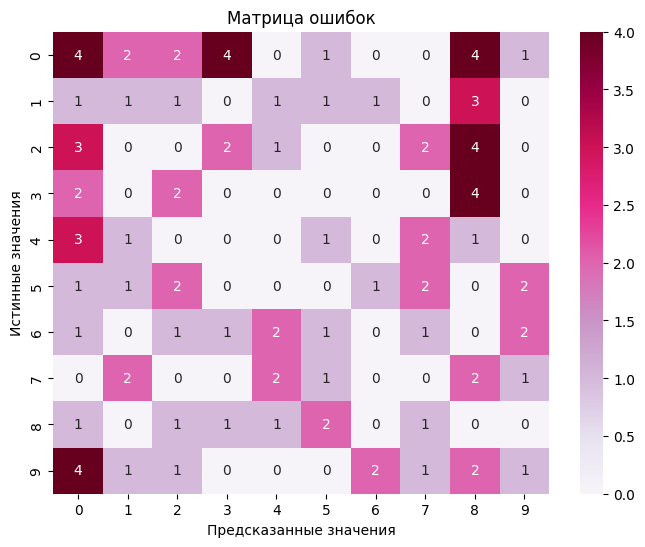

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='PuRd')
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()